In [2]:
# cfg = {
#     "batch_size":128,
#     "img_size":224,
#     "path":"/home/aiuser/kyunghoney/data/Puzzle",
#     "train_size":0.9,
#     "superimpose":True,
#     "head_channel":256,
#     "num_labels":4
# } 
# train_loader, _, _ = Loader(cfg)

# img, lab,smap = next(iter(train_loader))

# print(img.size())
# print(lab.size())
# print(smap.size())
# means = torch.tensor([0.485, 0.456, 0.406]).unsqueeze(dim=1).unsqueeze(dim=1).expand((3,224,224))
# stds = torch.tensor([0.229, 0.224, 0.225]).unsqueeze(dim=1).unsqueeze(dim=1).expand((3,224,224))
# img = img*stds + means

# img1 = np.transpose(img[0], (1,2,0))
# plt.imshow(img1)
# plt.show()

# plt.imshow(shuffle_image(img1, lab[0].reshape(-1,).argsort())[0])
# plt.show()

In [18]:
# configuration & pre-training

import torch
import torchvision

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from puzzles_v2 import *

cfg = {
    "seed":20240116,
    "batch_size":1,
    "img_size":256,
    "max_width":2,
    "max_height":100,
    "weight":1 - 24/512,
    "threshold":0.8,
    "train_size":0.9,
    "superimpose":True,
    
    "learning_rate":0.025,
    "weight_decay":0.0001,
    "num_epochs":100,
    "save_path":"/home/aiuser/taeuk",
    "path":"/home/aiuser/kyunghoney/data/Puzzle",
    "save_epoch":5,
    "save_point":1
}
seed_everything(cfg['seed']) # Seed 고정

train_loader, valid_loader, test_loader = Loader(cfg)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Model(cfg).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=cfg["learning_rate"], weight_decay=cfg["weight_decay"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=cfg["num_epochs"]//5, eta_min=cfg["learning_rate"]/10)

best_model = train(cfg, model, optimizer, scheduler, train_loader, valid_loader, device)

# [1] 129925

/home/aiuser/.conda/envs/taeuk/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


RuntimeError: Calculated padded input size per channel: (64 x 2). Kernel size: (65 x 2). Kernel size can't be greater than actual input size

/home/aiuser/.conda/envs/taeuk/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


torch.Size([1, 512, 3, 64, 128])
torch.Size([1, 512])
torch.Size([1, 4, 4])


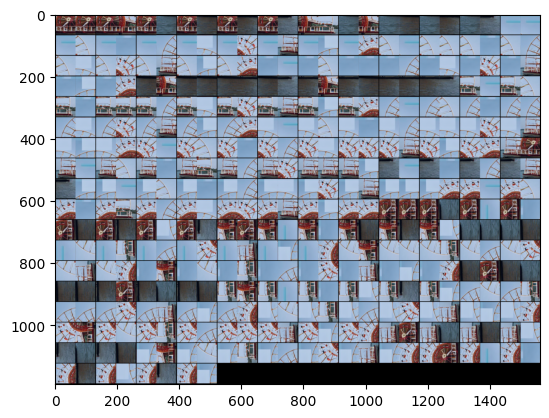

In [11]:
import torch
import torchvision

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from puzzles_v2 import *
cfg = {
    "seed":20240116,
    "batch_size":1,
    "img_size":256,
    "max_width":5,
    "max_height":50,
    "weight":0.55,
    "threshold":0.8,
    "train_size":0.9,
    "superimpose":True,
    
    "learning_rate":0.025,
    "weight_decay":0.0001,
    "num_epochs":100,
    "save_path":"/home/aiuser/taeuk",
    "path":"/home/aiuser/kyunghoney/data/Puzzle",
    "save_epoch":5,
    "save_point":1
}

train_loader, valid_loader, test_loader = Loader(cfg)
img, bnb, lab = next(iter(train_loader))
print(img.shape)
print(bnb.shape)
print(lab.shape)

bnb = bnb.squeeze()


logit = model(img.to(device).reshape(-1, 3, cfg["img_size"]//4, cfg["img_size"]//2))
acc_pred = logit.softmax(dim=1).argmax(dim=1).cpu()
i = torch.arange(acc_pred.shape[0])[acc_pred==1]
plt.imshow(np.transpose(torchvision.utils.make_grid(img.squeeze()[i], nrow=12, normalize=True), (1,2,0)))

In [ ]:

import torch
import torchvision

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from puzzles_v2 import *

img, bnb, lab = next(iter(train_loader))

logit = model(img.squeeze().to(device))
logit = logit.softmax(dim=1).argmax(dim=1)
logit.shape

horizon = logit[256:].reshape(16, 16).sigmoid()
#horizon = horizon.where(horizon >= 1. , 0)

vertical = logit[:256].reshape(16, 16).sigmoid()
#vertical = vertical.where(vertical >= 1. , 0)

print(horizon.sum())
plt.imshow(horizon.detach().cpu().numpy())
plt.colorbar()
plt.show()

NameError: name 'train_loader' is not defined

In [ ]:
print(edges_h)
print(edges_v)

[[10, 3], [0, 5]]
[[7, 8], [3, 7], [8, 4], [1, 11], [13, 2], [14, 13], [10, 15], [6, 14], [15, 9], [9, 5], [4, 10], [5, 10]]
